In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

from catboost import CatBoostClassifier

from lightgbm import LGBMClassifier

In [74]:
df = pd.read_csv('Kidney_Decease.csv', sep=';')

In [75]:
df.shape

(400, 25)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      397 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [77]:
df.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         3
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [78]:
#df.dropna(inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)

In [79]:
df.shape

(400, 25)

In [80]:
df.isnull().sum()

age        0
bp         0
sg         0
al         0
su         0
rbc      152
pc        65
pcc        4
ba         4
bgr        0
bu         0
sc         0
sod        0
pot        0
hemo       0
pcv        0
wbcc       0
rbcc       0
htn        2
dm         3
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [81]:
df.drop(['rbc', 'pc', 'wbcc', 'rbcc'], axis=1, inplace=True)

In [82]:
df.dropna(inplace=True)
df.shape

(392, 21)

In [83]:
labelencoder = LabelEncoder()
df['pcc'] = labelencoder.fit_transform(df['pcc'])
df['ba'] = labelencoder.fit_transform(df['ba'])
df['htn'] = df['htn'].apply(lambda x: ['no', 'yes'].index(x))
df['dm'] = df['dm'].apply(lambda x: ['no', 'yes'].index(x))
df['cad'] = df['cad'].apply(lambda x: ['no', 'yes'].index(x))
df['appet'] = df['appet'].apply(lambda x: ['no', 'poor', 'good'].index(x))
df['pe'] = df['pe'].apply(lambda x: ['no', 'good', 'yes'].index(x))
df['ane'] = df['ane'].apply(lambda x: ['no', 'yes'].index(x))
df['class'] = df['class'].apply(lambda x: ['notckd', 'ckd'].index(x))

In [84]:
pd.set_option('display.max_columns', None)
df.head()

,age,bp,sg,al,su,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0,0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,1,1,0,2,0,0,1
1,7.0,50.0,1.020,4.0,0.0,0,0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,0,0,0,2,0,0,1
2,62.0,80.0,1.010,2.0,3.0,0,0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,1,0,0,1,2,1,1
4,51.0,80.0,1.010,2.0,0.0,0,0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,0,0,0,2,0,0,1


In [87]:
X=df.drop('class', axis=1)
y=df[['class']]
scaler = MinMaxScaler()    #feature_range=(0, 1)
scaler = scaler.fit(X)
X_normalized = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y.values.ravel(), test_size=0.3, random_state=1)

In [89]:
def model_scorer(model):
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    precision_positive = metrics.precision_score(y_test, predict, pos_label=1)
    precision_negative = metrics.precision_score(y_test, predict, pos_label=0)
    recall_sensitivity = metrics.recall_score(y_test, predict, pos_label=1)
    recall_specificity = metrics.recall_score(y_test, predict, pos_label=0)
    auc = metrics.roc_auc_score(y_test, predict)
    print('Метрики модели:')
    print(f'Accuracy: {model.score(X_test, y_test)}')
    print(f'Precision: {precision_positive, precision_negative}')
    print(f'Recall: {recall_sensitivity, recall_specificity}')
    print(f'AUC: {auc}')
    fpr, tpr, _ = metrics.roc_curve(y_test,  predict)
    plt.plot(fpr,tpr)
    plt.ylabel('Истинно-положительный результат')
    plt.xlabel('Ложно-положительный результат')
    plt.show()

Метрики модели:
Accuracy: 0.940677966101695
Precision: (1.0, 0.8703703703703703)
Recall: (0.9014084507042254, 1.0)
AUC: 0.9507042253521127


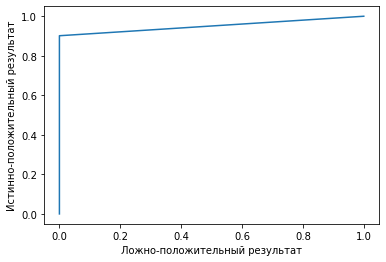

In [92]:
gb_defaut_model = GradientBoostingClassifier()
model_scorer(gb_defaut_model)

Метрики модели:
Accuracy: 0.9915254237288136
Precision: (1.0, 0.9791666666666666)
Recall: (0.9859154929577465, 1.0)
AUC: 0.9929577464788732


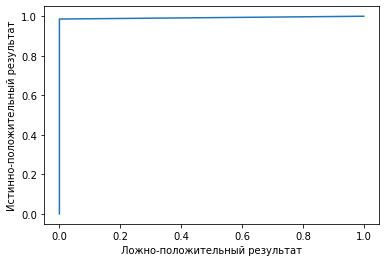

In [95]:
xgb_default_model = XGBClassifier()
model_scorer(xgb_default_model)

Learning rate set to 0.005927
0:	learn: 0.6823166	total: 3.08ms	remaining: 3.08s
1:	learn: 0.6736218	total: 4.96ms	remaining: 2.47s
2:	learn: 0.6627835	total: 7.14ms	remaining: 2.37s
3:	learn: 0.6513323	total: 9.09ms	remaining: 2.26s
4:	learn: 0.6426493	total: 11.1ms	remaining: 2.2s
5:	learn: 0.6334545	total: 13.7ms	remaining: 2.27s
6:	learn: 0.6240236	total: 15.8ms	remaining: 2.24s
7:	learn: 0.6143557	total: 17.8ms	remaining: 2.2s
8:	learn: 0.6054000	total: 19.6ms	remaining: 2.16s
9:	learn: 0.5970385	total: 21.6ms	remaining: 2.13s
10:	learn: 0.5883442	total: 23.6ms	remaining: 2.13s
11:	learn: 0.5793146	total: 25.6ms	remaining: 2.11s
12:	learn: 0.5692324	total: 28ms	remaining: 2.12s
13:	learn: 0.5627512	total: 30.4ms	remaining: 2.14s
14:	learn: 0.5543552	total: 32.4ms	remaining: 2.13s
15:	learn: 0.5475003	total: 34.4ms	remaining: 2.11s
16:	learn: 0.5390401	total: 36.6ms	remaining: 2.11s
17:	learn: 0.5314503	total: 38.6ms	remaining: 2.1s
18:	learn: 0.5244856	total: 40.6ms	remaining: 2.1

219:	learn: 0.0676844	total: 495ms	remaining: 1.75s
220:	learn: 0.0673525	total: 497ms	remaining: 1.75s
221:	learn: 0.0669054	total: 500ms	remaining: 1.75s
222:	learn: 0.0664128	total: 502ms	remaining: 1.75s
223:	learn: 0.0658975	total: 504ms	remaining: 1.75s
224:	learn: 0.0652849	total: 506ms	remaining: 1.74s
225:	learn: 0.0647982	total: 508ms	remaining: 1.74s
226:	learn: 0.0642452	total: 511ms	remaining: 1.74s
227:	learn: 0.0638542	total: 513ms	remaining: 1.74s
228:	learn: 0.0634059	total: 516ms	remaining: 1.74s
229:	learn: 0.0630440	total: 518ms	remaining: 1.73s
230:	learn: 0.0627616	total: 521ms	remaining: 1.73s
231:	learn: 0.0623772	total: 523ms	remaining: 1.73s
232:	learn: 0.0620402	total: 525ms	remaining: 1.73s
233:	learn: 0.0616662	total: 527ms	remaining: 1.73s
234:	learn: 0.0613141	total: 530ms	remaining: 1.72s
235:	learn: 0.0608901	total: 532ms	remaining: 1.72s
236:	learn: 0.0604759	total: 534ms	remaining: 1.72s
237:	learn: 0.0601860	total: 536ms	remaining: 1.72s
238:	learn: 

441:	learn: 0.0224712	total: 993ms	remaining: 1.25s
442:	learn: 0.0223838	total: 996ms	remaining: 1.25s
443:	learn: 0.0223146	total: 998ms	remaining: 1.25s
444:	learn: 0.0222347	total: 1s	remaining: 1.25s
445:	learn: 0.0221518	total: 1s	remaining: 1.25s
446:	learn: 0.0220795	total: 1s	remaining: 1.24s
447:	learn: 0.0219824	total: 1.01s	remaining: 1.24s
448:	learn: 0.0219065	total: 1.01s	remaining: 1.24s
449:	learn: 0.0218414	total: 1.01s	remaining: 1.24s
450:	learn: 0.0217620	total: 1.02s	remaining: 1.24s
451:	learn: 0.0216743	total: 1.02s	remaining: 1.24s
452:	learn: 0.0216073	total: 1.02s	remaining: 1.23s
453:	learn: 0.0215260	total: 1.02s	remaining: 1.23s
454:	learn: 0.0214648	total: 1.02s	remaining: 1.23s
455:	learn: 0.0214003	total: 1.03s	remaining: 1.23s
456:	learn: 0.0212988	total: 1.03s	remaining: 1.22s
457:	learn: 0.0212304	total: 1.03s	remaining: 1.22s
458:	learn: 0.0211682	total: 1.03s	remaining: 1.22s
459:	learn: 0.0211128	total: 1.04s	remaining: 1.22s
460:	learn: 0.0210451

667:	learn: 0.0119937	total: 1.5s	remaining: 746ms
668:	learn: 0.0119680	total: 1.5s	remaining: 744ms
669:	learn: 0.0119462	total: 1.51s	remaining: 742ms
670:	learn: 0.0119127	total: 1.51s	remaining: 740ms
671:	learn: 0.0118792	total: 1.51s	remaining: 738ms
672:	learn: 0.0118568	total: 1.51s	remaining: 736ms
673:	learn: 0.0118322	total: 1.52s	remaining: 733ms
674:	learn: 0.0117999	total: 1.52s	remaining: 731ms
675:	learn: 0.0117806	total: 1.52s	remaining: 729ms
676:	learn: 0.0117606	total: 1.52s	remaining: 727ms
677:	learn: 0.0117372	total: 1.53s	remaining: 725ms
678:	learn: 0.0117065	total: 1.53s	remaining: 723ms
679:	learn: 0.0116831	total: 1.53s	remaining: 720ms
680:	learn: 0.0116495	total: 1.53s	remaining: 718ms
681:	learn: 0.0116189	total: 1.53s	remaining: 716ms
682:	learn: 0.0115954	total: 1.54s	remaining: 714ms
683:	learn: 0.0115736	total: 1.54s	remaining: 712ms
684:	learn: 0.0115413	total: 1.54s	remaining: 710ms
685:	learn: 0.0115197	total: 1.54s	remaining: 708ms
686:	learn: 0.

901:	learn: 0.0076882	total: 2s	remaining: 218ms
902:	learn: 0.0076764	total: 2s	remaining: 215ms
903:	learn: 0.0076648	total: 2.01s	remaining: 213ms
904:	learn: 0.0076557	total: 2.01s	remaining: 211ms
905:	learn: 0.0076446	total: 2.01s	remaining: 209ms
906:	learn: 0.0076309	total: 2.01s	remaining: 206ms
907:	learn: 0.0076193	total: 2.01s	remaining: 204ms
908:	learn: 0.0076099	total: 2.02s	remaining: 202ms
909:	learn: 0.0075991	total: 2.02s	remaining: 200ms
910:	learn: 0.0075843	total: 2.04s	remaining: 199ms
911:	learn: 0.0075696	total: 2.04s	remaining: 197ms
912:	learn: 0.0075543	total: 2.04s	remaining: 195ms
913:	learn: 0.0075399	total: 2.05s	remaining: 193ms
914:	learn: 0.0075256	total: 2.05s	remaining: 190ms
915:	learn: 0.0075129	total: 2.05s	remaining: 188ms
916:	learn: 0.0075018	total: 2.05s	remaining: 186ms
917:	learn: 0.0074873	total: 2.05s	remaining: 184ms
918:	learn: 0.0074785	total: 2.06s	remaining: 181ms
919:	learn: 0.0074652	total: 2.06s	remaining: 179ms
920:	learn: 0.0074

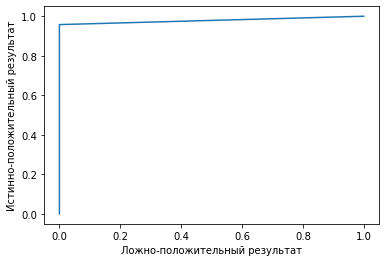

In [100]:
cb_default_model = CatBoostClassifier()
model_scorer(cb_default_model)

Метрики модели:
Accuracy: 0.9576271186440678
Precision: (1.0, 0.9038461538461539)
Recall: (0.9295774647887324, 1.0)
AUC: 0.9647887323943662


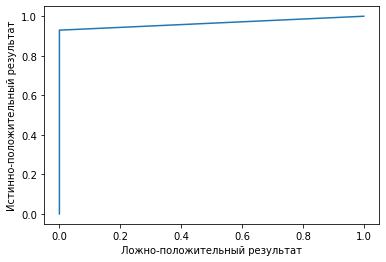

In [104]:
lgbm_default_model = LGBMClassifier()
model_scorer(lgbm_default_model)